In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv')

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [14]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
summary_stats = df.describe()
print("Summary statistics for numerical columns:")
print(summary_stats)

Summary statistics for numerical columns:
         work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.692133  1.544357e+06   70957.259411      40.70913
min    2020.000000  4.000000e+03    2859.000000       0.00000
25%    2021.000000  7.000000e+04   62726.000000      50.00000
50%    2022.000000  1.150000e+05  101570.000000     100.00000
75%    2022.000000  1.650000e+05  150000.000000     100.00000
max    2022.000000  3.040000e+07  600000.000000     100.00000


# **Exploratory Data Analysis**

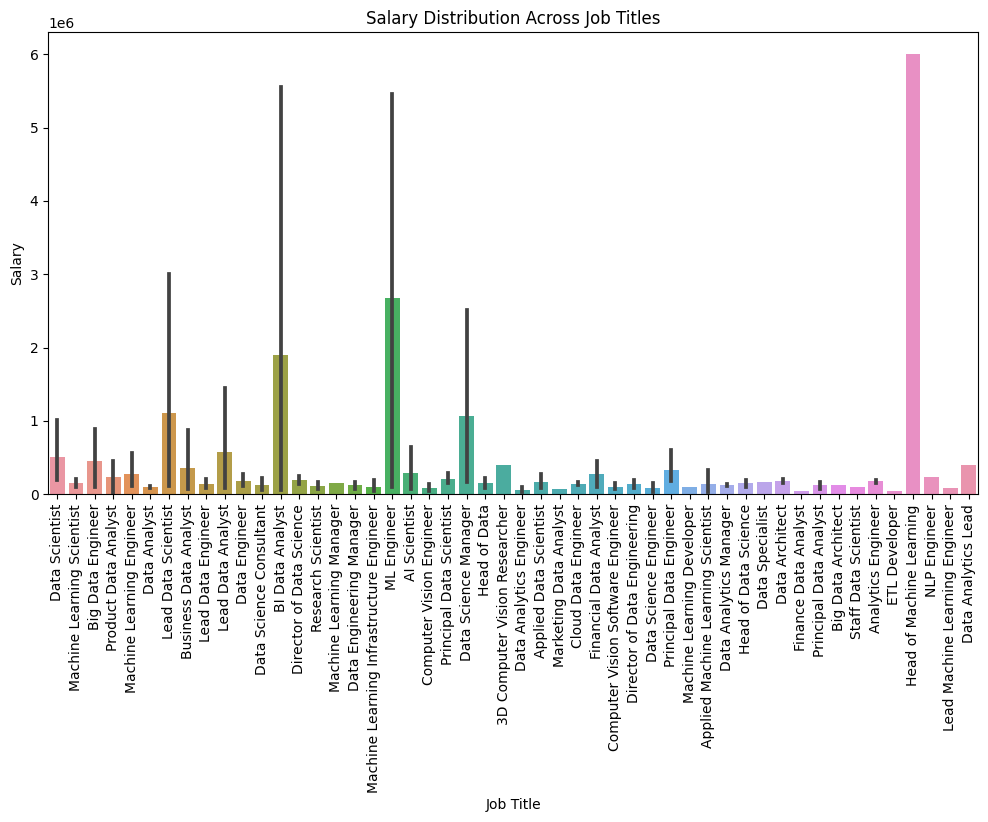

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

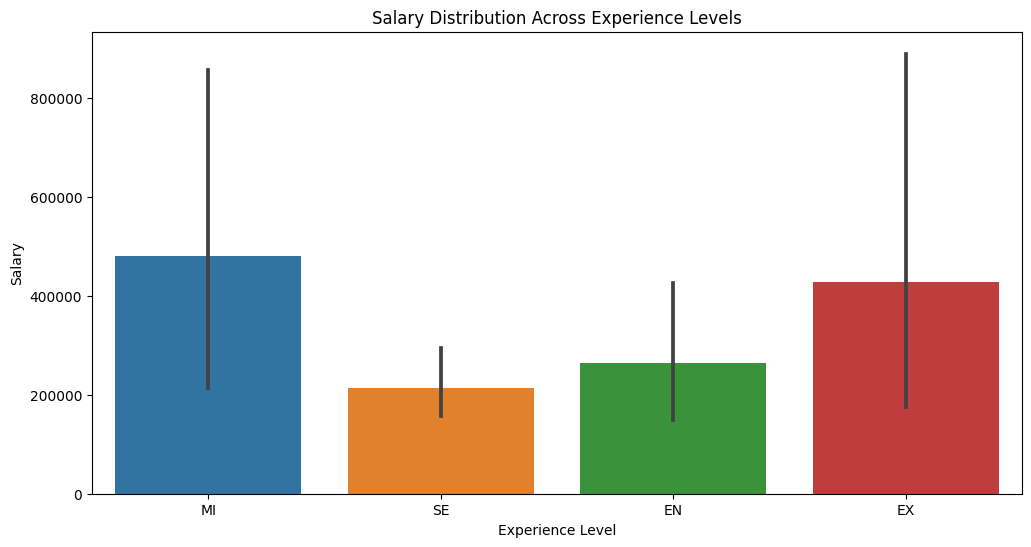

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

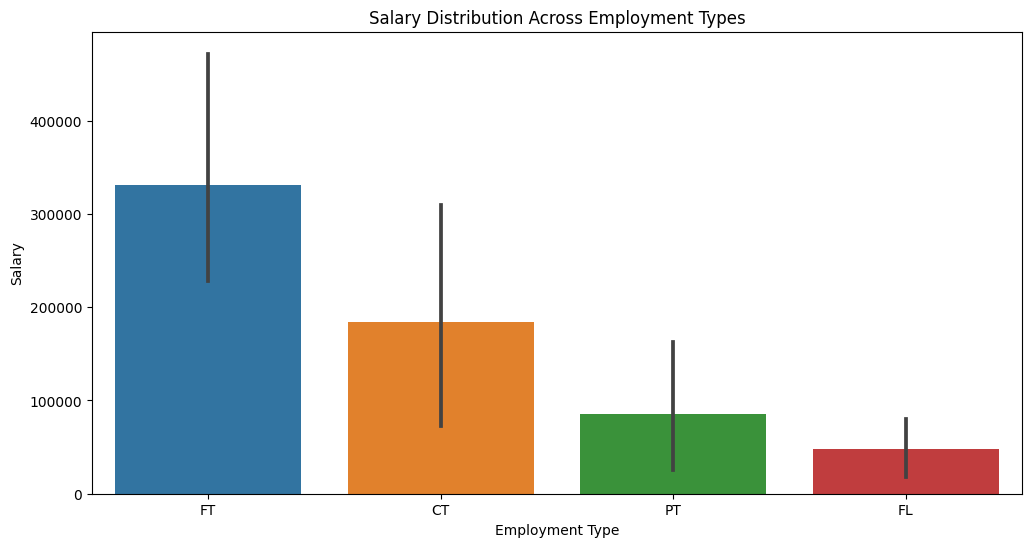

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

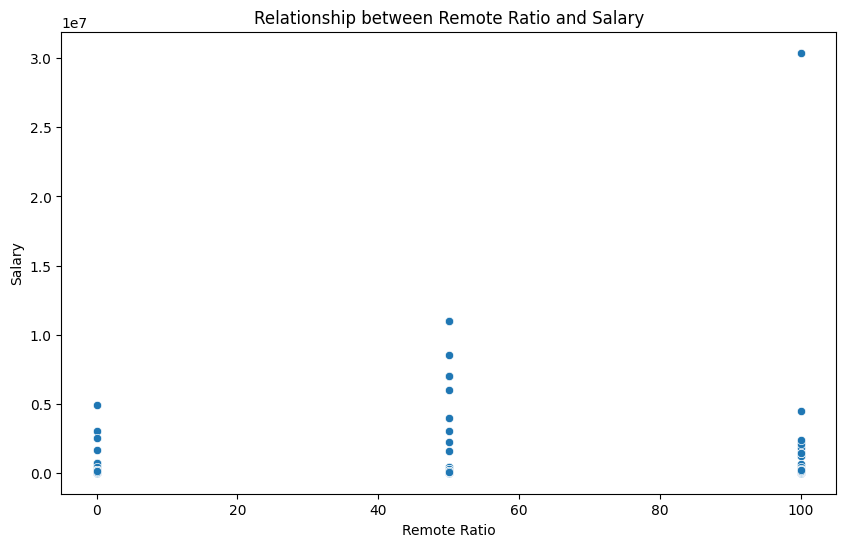

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

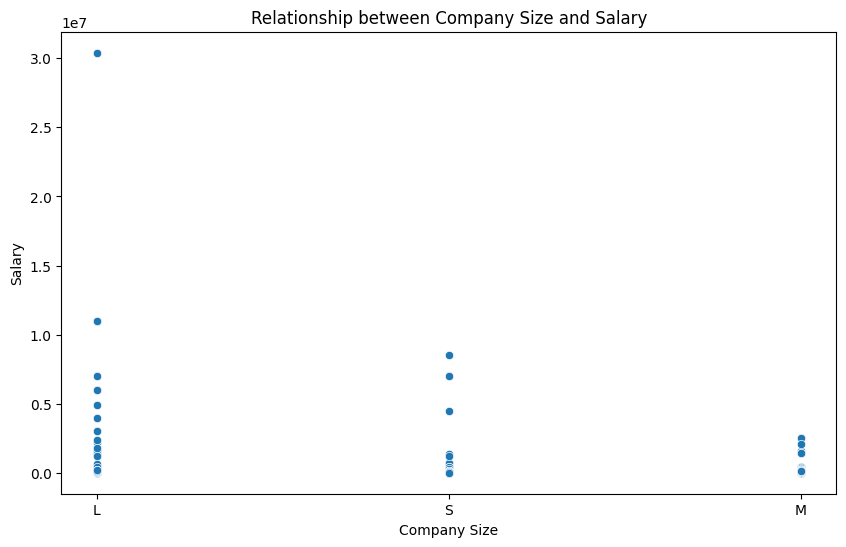

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary', data=df)
plt.title('Relationship between Company Size and Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

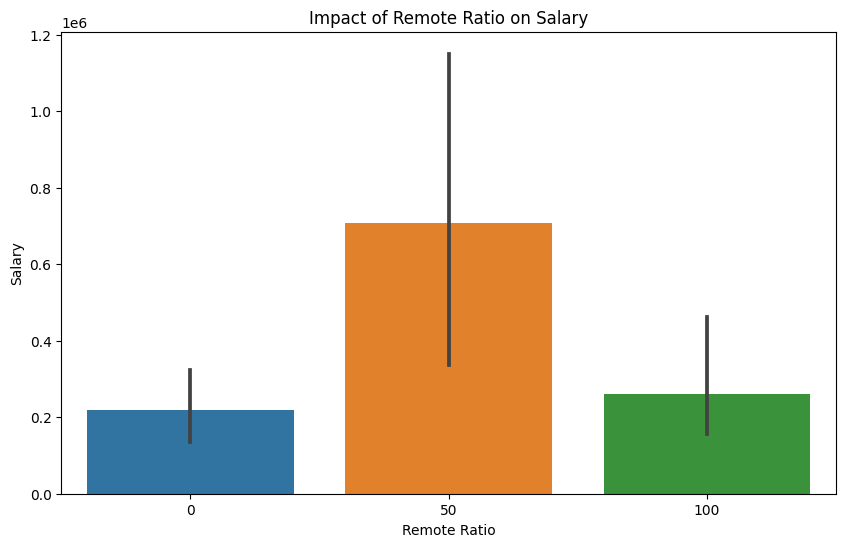

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=df)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

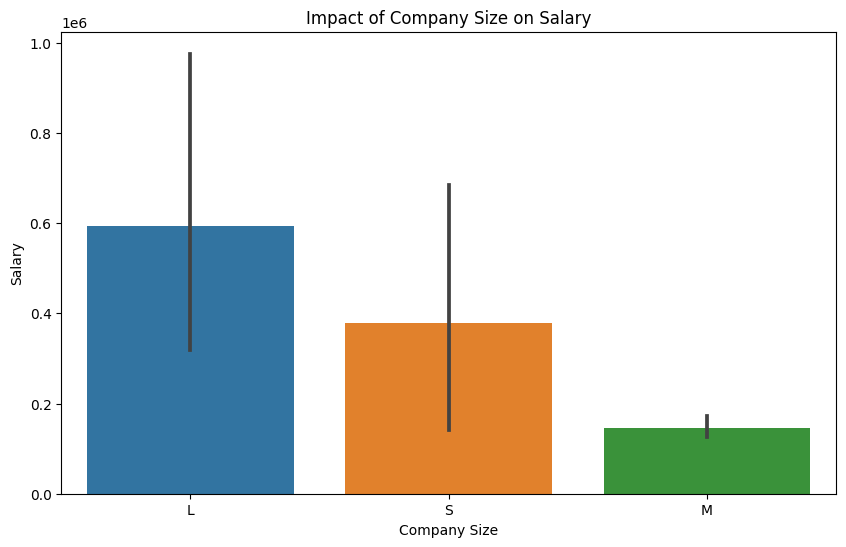

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary', data=df)
plt.title('Impact of Company Size on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

# **Featue Engineering**

In [26]:
# Calculate average salary per job title

avg_salary_per_title = df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = df.merge(avg_salary_per_title, on='job_title', how='left')

In [27]:
# Calculate average salary per experience level

avg_salary_per_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = df.merge(avg_salary_per_exp, on='experience_level', how='left')

In [28]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,avg_salary_per_title,avg_salary_per_experience
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,508347.202797,480617.690141
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,158412.500000,213949.353571
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,455000.000000,213949.353571
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,235000.000000,480617.690141
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,272717.878049,213949.353571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,179210.553030,213949.353571
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,179210.553030,213949.353571
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,96604.958763,213949.353571
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,96604.958763,213949.353571


In [29]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'avg_salary_per_title', 'avg_salary_per_experience'],
      dtype='object')